In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

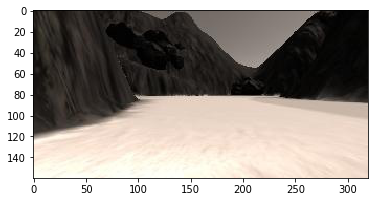

In [7]:
filename = 'sample.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

In [8]:
print(image.dtype, image.shape, np.min(image), np.max(image))

uint8 (160, 320, 3) 0 255


In [9]:
red_channel = np.copy(image)
green_channel = np.copy(image)
blue_channel = np.copy(image)

In [10]:
red_channel[:,:,[1,2]] = 0
green_channel[:,:,[0,2]] = 0
blue_channel[:,:,[0,1]] = 0

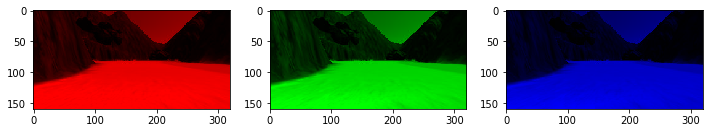

In [11]:
fig = plt.figure(figsize=(12,3))

plt.subplot(131)
plt.imshow(red_channel)

plt.subplot(132)
plt.imshow(green_channel)

plt.subplot(133)
plt.imshow(blue_channel)

plt.show()

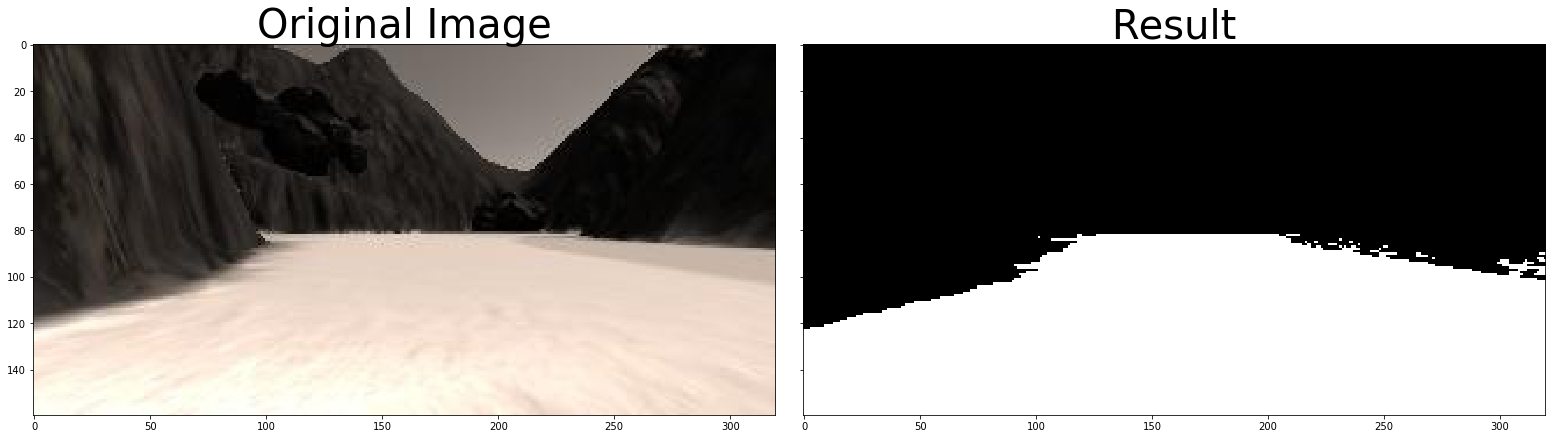

In [22]:
def color_thresh(img, rgb_thresh=(0,0,0)):
    color_select_img = np.zeros_like(img[:,:,0])
    
    for y_i, y in enumerate(img):
        for x_i, x in enumerate(y):
            r, g, b = x
            if r > red_threshold or g > green_threshold or b > blue_threshold:
                color_select_img[y_i,x_i] = 1
                
    # Alternate approach:
    #above_thresh = (img[:,:,0] > rgb_thresh[0]) & (img[:,:,1] > rgb_thresh[1]) & (img[:,:,2] > rgb_thresh[2])
    #color_select_img[above_thresh] = 1
    
    return color_select_img

red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = (red_threshold, green_threshold, blue_threshold)

color_select_img = color_thresh(image, rgb_thresh=rgb_threshold)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(color_select_img, cmap='gray')
ax2.set_title('Result', fontsize=40)

plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0)
plt.show()